In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

In [150]:
data_dir = "/workspaces/Recommenders-Systems/data"
books_path = os.path.join(data_dir,"Books.csv")
users_path = os.path.join(data_dir,"Users.csv")
ratings_path = os.path.join(data_dir,"Book-Ratings.csv")

In [151]:
books_df = pd.read_csv(books_path, sep=";", encoding='latin-1', on_bad_lines='skip')
users_df = pd.read_csv(users_path, sep=";", encoding='latin-1', on_bad_lines='skip')
ratings_df = pd.read_csv(ratings_path, sep=";", encoding='latin-1', on_bad_lines='skip')

/tmp/ipykernel_2659/4070875322.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_path, sep=";", encoding='latin-1', on_bad_lines='skip')


In [152]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [153]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [154]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [155]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [156]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [157]:
books_df.shape

(271360, 8)

In [158]:
books_df_clean = books_df.dropna()
books_df_clean.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [159]:
users_df.loc[(users_df['Age'] > 100) | (users_df['Age'] < 5), 'Age'] = np.nan

In [160]:

median_age = users_df['Age'].median(skipna=True)
users_df_clean = users_df.copy()
users_df_clean['Age'].fillna(median_age, inplace=True)
users_df_clean['Age'] = users_df_clean['Age'].astype(int)

/tmp/ipykernel_2659/1453641695.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df_clean['Age'].fillna(median_age, inplace=True)


In [161]:
ratings_df_clean = ratings_df[ratings_df['Book-Rating'] > 0]

In [162]:
merged_df = pd.merge(ratings_df_clean, books_df_clean, on='ISBN', how='inner')

In [163]:
merged_df = pd.merge(merged_df, users_df_clean, on='User-ID', how='inner')

In [164]:
merged_df.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32


In [165]:
merged_df.drop(columns=['Image-URL-S','Image-URL-M'],inplace=True)
merged_df=merged_df.drop_duplicates()

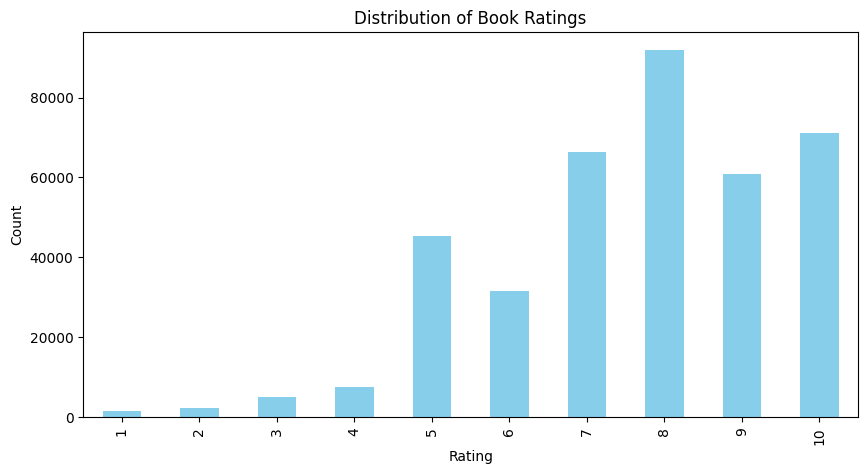

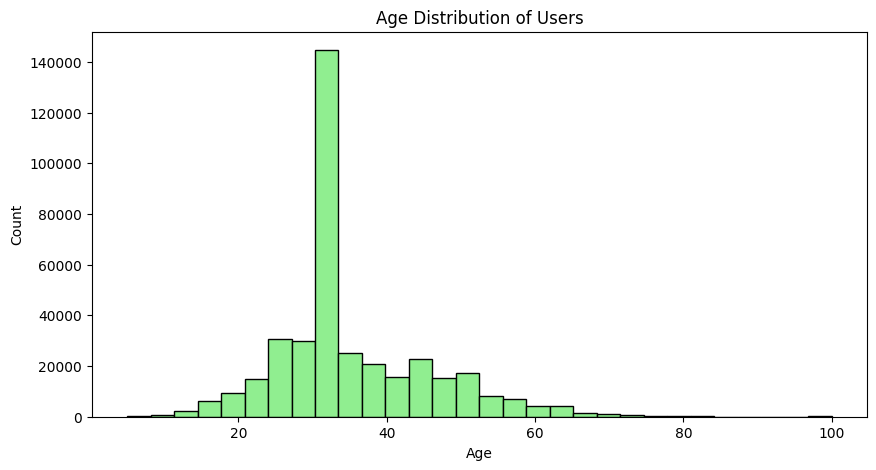

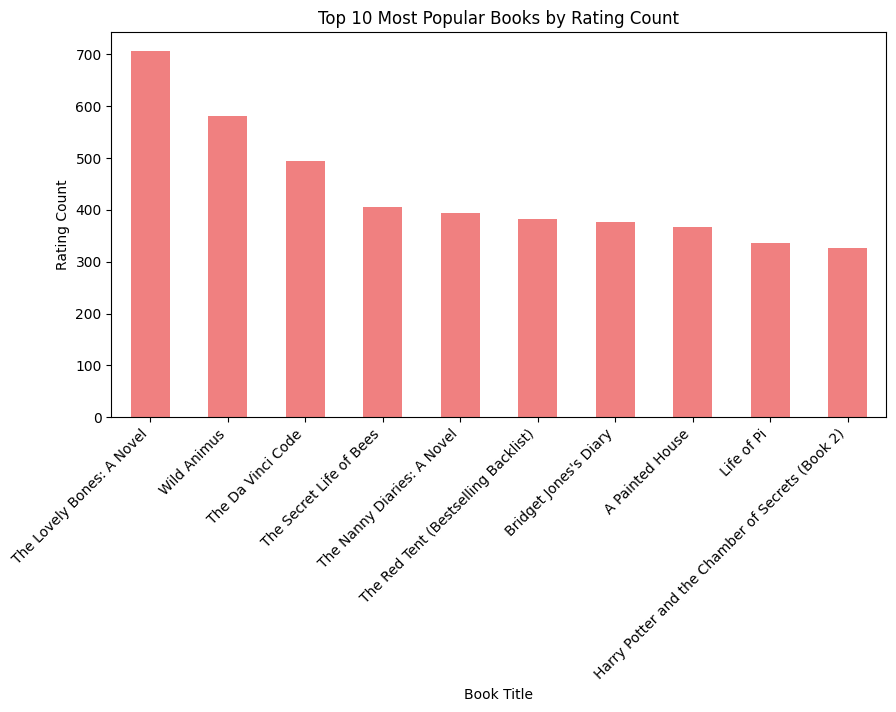

In [166]:

# 1. Distribution of Ratings
plt.figure(figsize=(10, 5))
ratings_distribution = merged_df['Book-Rating'].value_counts().sort_index()
ratings_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Age Demographics of Users
plt.figure(figsize=(10, 5))
age_distribution = merged_df['Age'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Most Popular Books by Rating Count
plt.figure(figsize=(10, 5))
top_books = merged_df['Book-Title'].value_counts().head(10)
top_books.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Books by Rating Count')
plt.xlabel('Book Title')
plt.ylabel('Rating Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [167]:
def identify_book(your_pick, book_df):
    return book_df[book_df['Book-Title'].str.contains(your_pick, flags=re.IGNORECASE, regex=True)].head(3)

In [168]:
identify_book('Harry',merged_df)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location,Age
22,276788,043935806X,7,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,"mentone, california, usa",32
79,276847,3551551677,10,Harry Potter und der Stein der Weisen,Joanne K. Rowling,1999,Carlsen Verlag GmbH,http://images.amazon.com/images/P/3551551677.0...,"köln, nordrhein-westfalen, germany",27
80,276847,3551551685,10,Harry Potter und die Kammer des Schreckens,Joanne K. Rowling,2000,Carlsen Verlag GmbH,http://images.amazon.com/images/P/3551551685.0...,"köln, nordrhein-westfalen, germany",27


In [169]:
merged_df.loc[:0]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32


In [134]:
merged_df.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32


/tmp/ipykernel_2659/4244800580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Age'])


Text(0.5, 1.0, 'Age Distribution Plot')

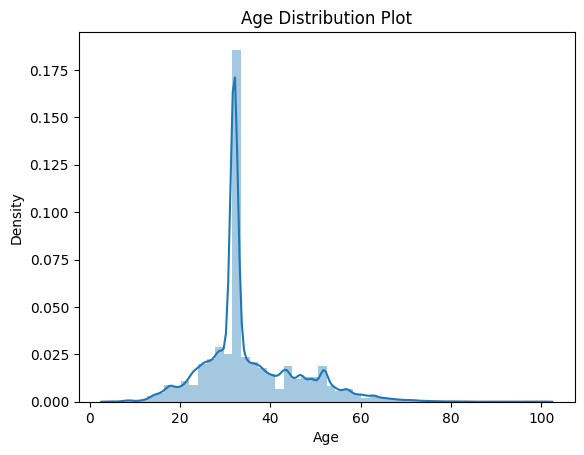

In [170]:

sns.distplot(merged_df['Age'])
plt.title('Age Distribution Plot')

In [172]:
number_rating = merged_df.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating
     

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135558,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135559,Ã?Â?rger mit Produkt X. Roman.,3
135560,Ã?Â?sterlich leben.,1
135561,Ã?Â?stlich der Berge.,1


In [173]:
rating_count = merged_df.groupby('ISBN')['Book-Rating'].count().reset_index()
rating_count.columns = ['ISBN', 'Rating_Count']

In [174]:
rating_count

,ISBN,Rating_Count
0,0000913154,1
1,0001046438,1
2,000104687X,1
3,0001047213,1
4,0001047973,2
...,...,...
149826,B0001FZGPI,1
149827,B0001FZGRQ,1
149828,B0001GMSV2,2
149829,B0001I1KOG,1


In [175]:
merged_df_with_count = pd.merge(merged_df, rating_count, on='ISBN', how='left')

In [177]:
merged_df_with_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383837 entries, 0 to 383836
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              383837 non-null  int64 
 1   ISBN                 383837 non-null  object
 2   Book-Rating          383837 non-null  int64 
 3   Book-Title           383837 non-null  object
 4   Book-Author          383837 non-null  object
 5   Year-Of-Publication  383837 non-null  object
 6   Publisher            383837 non-null  object
 7   Image-URL-L          383837 non-null  object
 8   Location             383837 non-null  object
 9   Age                  383837 non-null  int64 
 10  Rating_Count         383837 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 32.2+ MB


In [182]:
merged_df_with_count.to_pickle("../data/merged_df.pkl")